# Sports Celebrity Image Classification

In [1]:
# First, install the OpenCV library
!pip install opencv-python

# Then import the libraries
import numpy as np
import cv2  # This will work after installation
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# (1) Preprocessing: Detect face and eyes

When we look at any image, most of the time we identify a person using a face. 
An image might contain multiple faces, also the face can be obstructed and not clear. 
The first step in our pre-processing pipeline is to detect faces from an image. 
Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it

Now how do you detect face and eyes?

In [2]:
img =cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

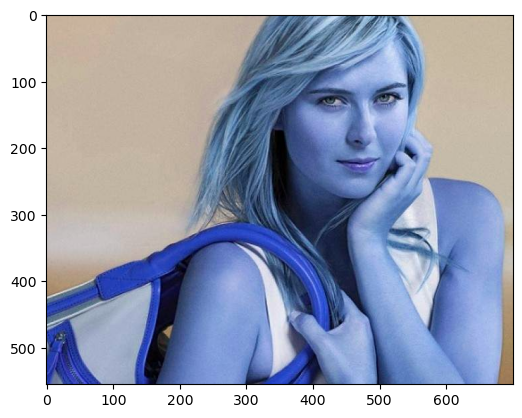

In [3]:
plt.imshow(img)
plt.show()

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape


(555, 700)

In [5]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

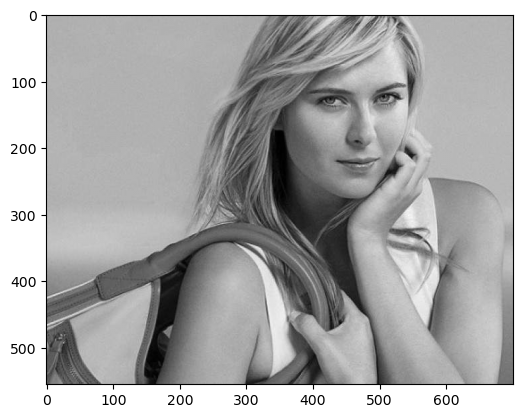

In [6]:
plt.imshow(gray, cmap='gray')
plt.show()

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(352), np.int32(38), np.int32(233), np.int32(233))

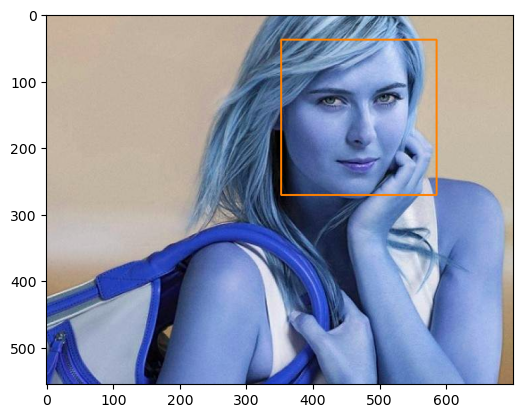

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,129,0),2)
plt.imshow(face_img)
plt.show()

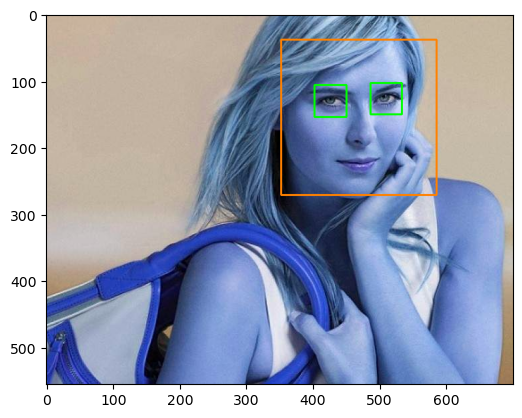

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,129,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

# (2) Preprocessing: Crop the facial region of the image

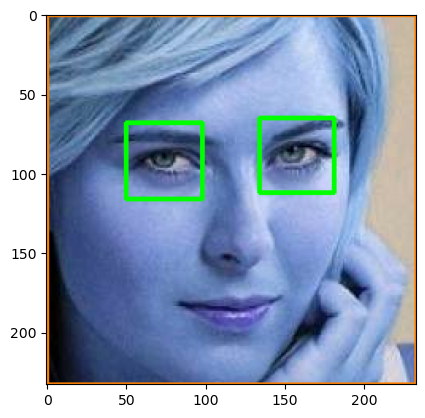

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
plt.show()

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(233, 233, 3)

# (3) Preprocessing: Use wavelet transform as a feature for traning our model¶

In wavelet transformed image, you can see edges clearly and 
that can give us clues on various facial features such as eyes, nose, lips etc

# Wavelet transform

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

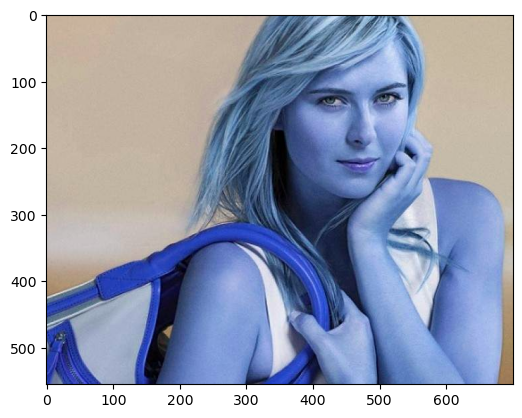

In [14]:
original_image = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)
plt.show()

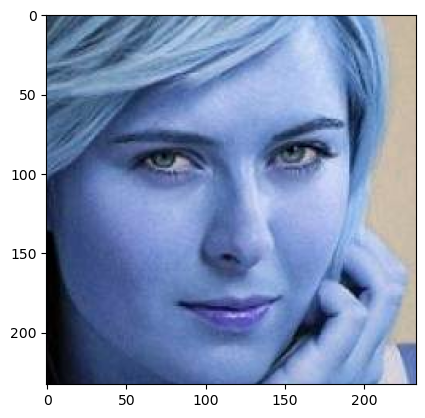

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)
plt.show()

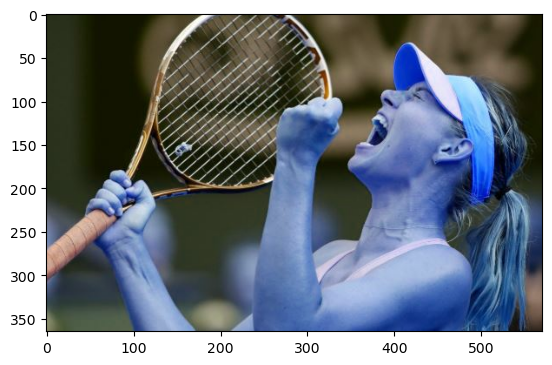

In [16]:
org_image_obstructed = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(org_image_obstructed)
plt.show()

In [17]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image_no_2_eyes

Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training

In [18]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [21]:
import os
import shutil
import stat

def remove_readonly(func, path, _):
    os.chmod(path, stat.S_IWRITE)  # Make file writable
    func(path)

path_to_cr_data = './dataset/cropped/'

if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data, onerror=remove_readonly)

os.makedirs(path_to_cr_data)



In [22]:
cropped_image_dirs = []
celebrity_file_name_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_name_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)


            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


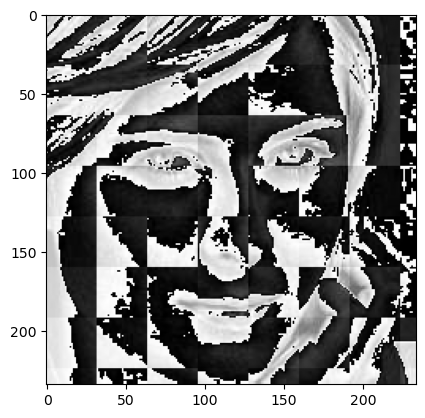

In [23]:
!pip install PyWavelets
# First, make sure you have the pywt library installed
# pip install PyWavelets

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

# Now use the function
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')
plt.show()

# Now you should have cropped folder under datasets folder that contains cropped images¶
Manually examine cropped folder and delete any unwanted images

In [24]:
celebrity_file_name_dict

{'cropped': [],
 'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_m

# Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

class_dict = {}
count = 0
for celebrity_name in celebrity_file_name_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

In [26]:
# First, define the class_dict dictionary that maps celebrity names to class labels
class_dict = {}
# Populate the dictionary with celebrity names as keys and their corresponding class labels as values
# For example:
for i, celebrity_name in enumerate(celebrity_file_name_dict.keys()):
    class_dict[celebrity_name] = i

# Now proceed with the original code
X, Y = [], []
for celebrity_name, training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1),scalled_img_har.reshape(32*32, 1)))
        X.append(combined_img)
        Y.append(class_dict[celebrity_name])

In [27]:
32*32*3 + 32*32

4096

In [28]:
len(X[0])

4096

In [29]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [30]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(167, 4096)

In [31]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

# Data cleaning process is done. Now we are ready to train our model

We will use SVM with rbf kernel tuned with heuristic finetuning

In [32]:
# Import SVC (Support Vector Classification) model from sklearn
from sklearn.svm import SVC

# Import StandardScaler for feature normalization
from sklearn.preprocessing import StandardScaler

# Import train_test_split to divide data into training and testing sets
from sklearn.model_selection import train_test_split

# Import Pipeline to chain multiple preprocessing steps and the model
from sklearn.pipeline import Pipeline

# Import classification_report to evaluate model performance
from sklearn.metrics import classification_report

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8095238095238095

In [34]:
len(X_test)

42

In [35]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.57      0.73         7
           2       0.90      0.90      0.90        10
           3       0.67      0.86      0.75         7
           4       0.57      0.57      0.57         7
           5       0.92      1.00      0.96        11

    accuracy                           0.81        42
   macro avg       0.81      0.78      0.78        42
weighted avg       0.83      0.81      0.81        42



# Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [37]:
# Import SVC (Support Vector Classification) model from sklearn
from sklearn import svm  # Imports the Support Vector Classification algorithm
from sklearn.ensemble import RandomForestClassifier  # Imports the Random Forest algorithm
from sklearn.linear_model import LogisticRegression  # This imports the Logistic Regression algorithm for classification
# Import Pipeline to chain multiple preprocessing steps and the model
from sklearn.pipeline import Pipeline  # Allows creating a sequence of data transformations followed by an estimator
from sklearn.model_selection import GridSearchCV  # Imports GridSearchCV for hyperparameter tuning through cross-validation

In [38]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [39]:
# Import the necessary libraries
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scores = []
best_estimators = {}
import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

C:\Users\ranji\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ranji\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ranji\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ranji\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

,model,best_score,best_params
0,svm,0.840,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.800,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.864,{'logisticregression__C': 10}


In [40]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, multi_class='auto',
                                     solver='liblinear'))])}

In [41]:
best_estimators['svm'].score(X_test,y_test)

0.8095238095238095

In [42]:
best_estimators['random_forest'].score(X_test,y_test)

0.6666666666666666

In [43]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7619047619047619

In [44]:
best_clf = best_estimators['svm']

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 4,  0,  1,  1,  1],
       [ 0,  9,  0,  1,  0],
       [ 0,  0,  6,  1,  0],
       [ 0,  1,  2,  4,  0],
       [ 0,  0,  0,  0, 11]])

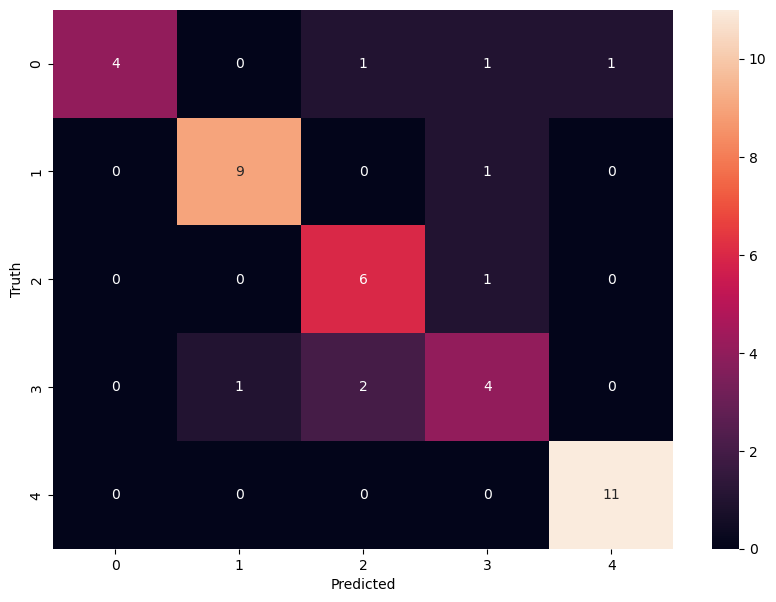

In [46]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [47]:
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

# Save the trained model

In [48]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

# Save class dictionary

In [50]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))